In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
ratings = pd.read_csv('/content/drive/MyDrive/ratings_Beauty.csv')


In [ ]:
ratings.head()


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
ratings.shape


(2023070, 4)

In [ ]:
ratings.dtypes


UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

In [ ]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


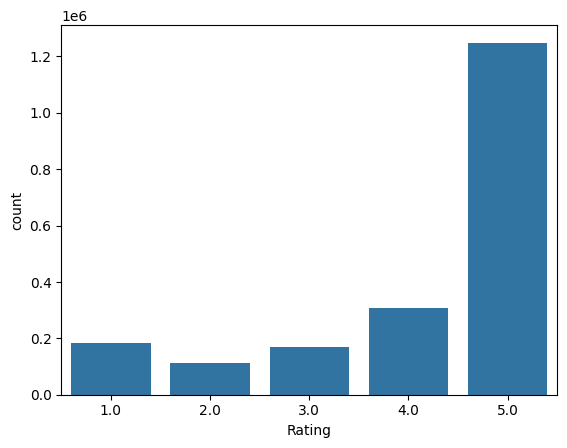

In [ ]:
sns.countplot(data=ratings, x='Rating');

In [ ]:
print('Minimum rating is: %d' %(ratings.Rating.min()))
print('Maximum rating is: %d' %(ratings.Rating.max()))


Minimum rating is: 1
Maximum rating is: 5


In [ ]:
print('Number of missing values across columns: \n',ratings.isna().sum())


Number of missing values across columns: 
 UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64


In [ ]:
print("Beauty Data Summary")
print("="*100)
print("\nTotal # of Ratings :", ratings.shape[0])
print("Total # of Users :", len(np.unique(ratings.UserId)))
print("Total # of Products :", len(np.unique(ratings.ProductId)))
print("\n")
print("="*100)

Beauty Data Summary

Total # of Ratings : 2023070
Total # of Users : 1210271
Total # of Products : 249274




In [ ]:
ratings.drop(['Timestamp'], axis=1,inplace=True)
max_ratings = ratings.groupby(['UserId','ProductId'])['Rating'].max().sort_values(ascending=False)
max_ratings.head()


UserId                 ProductId 
A00008821J0F472NDY6A2  B007T8XPC6    5.0
A37VVO7TSBO5ZU         B00CIUZ3BQ    5.0
A37VW08LBJEP6B         B001MW1MKM    5.0
A37VVVPM4RAGE2         B00513GE6K    5.0
A37VVV51R0QL8X         B007EITOSK    5.0
Name: Rating, dtype: float64

In [ ]:
min_ratings = ratings.groupby(['UserId','ProductId'])['Rating'].min().sort_values(ascending=True)
min_ratings.head()


UserId          ProductId 
A2QZWW93HD56SI  B001BXM27E    1.0
A2LGOBSOU3V74K  B004A8Y63A    1.0
A31KZLFNJFDYRP  B000E0K7R2    1.0
A2LGOX1LSBZQMD  B000TBF00K    1.0
A1QJ0NLN8R8CHS  B004AY737U    1.0
Name: Rating, dtype: float64

In [ ]:
ratings.drop_duplicates(inplace=True)
no_of_rated_products_per_user = ratings.groupby(by='UserId')['Rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
Name: Rating, dtype: int64

In [ ]:
no_of_rated_products_per_user.describe().astype(int).T

count    1210271
mean           1
std            2
min            1
25%            1
50%            1
75%            2
max          389
Name: Rating, dtype: int64

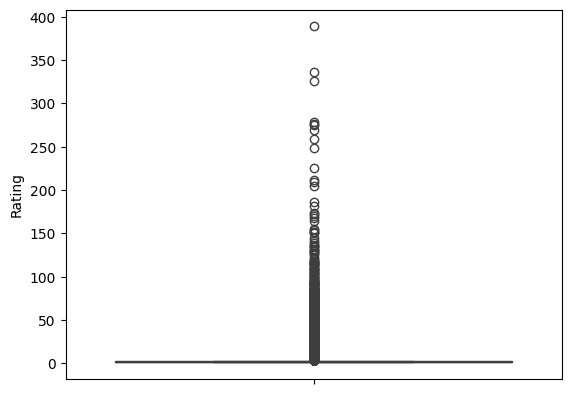

In [ ]:
sns.boxplot(data=no_of_rated_products_per_user);


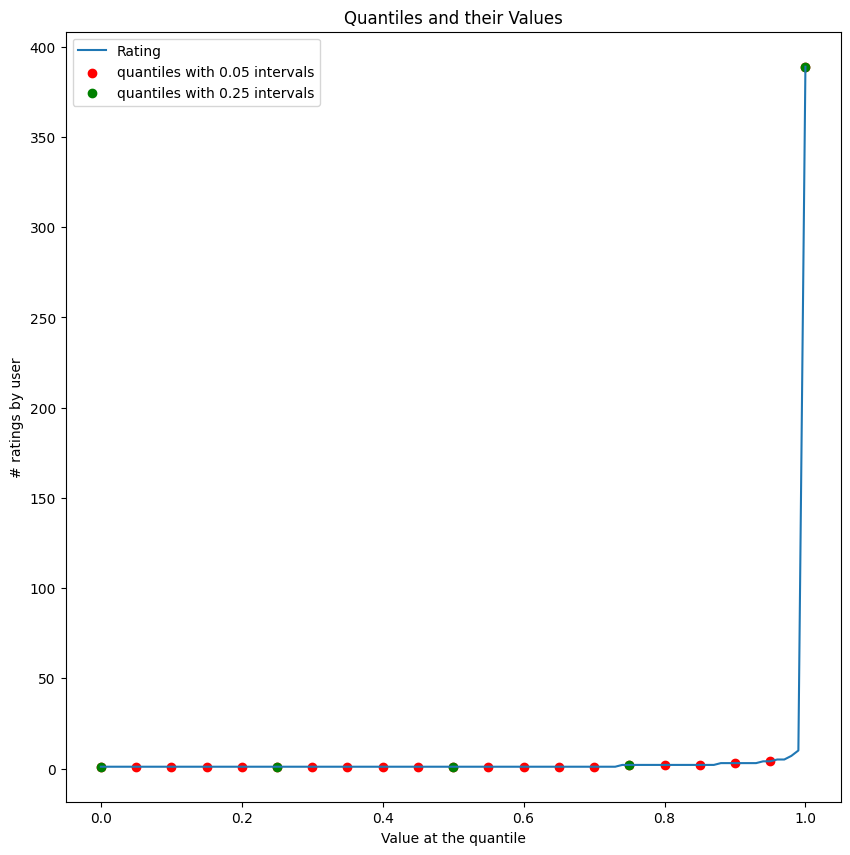

In [ ]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
 #quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='red', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='green', label = "quantiles with 0.25 intervals")
plt.ylabel('# ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [ ]:
print('\n # of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )




 # of rated product more than 50 per user : 361



In [ ]:
new_df=ratings.groupby("UserId").filter(lambda x:x['Rating'].count() >=50)




<function matplotlib.pyplot.show(close=None, block=None)>

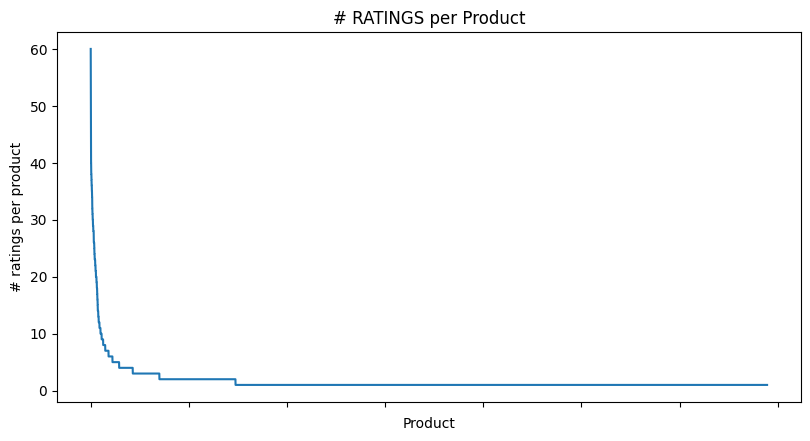

In [ ]:
no_of_ratings_per_product = new_df.groupby(by='ProductId')['Rating'].count().sort_values(ascending=False)
fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('# ratings per product')
ax.set_xticklabels([])
plt.show



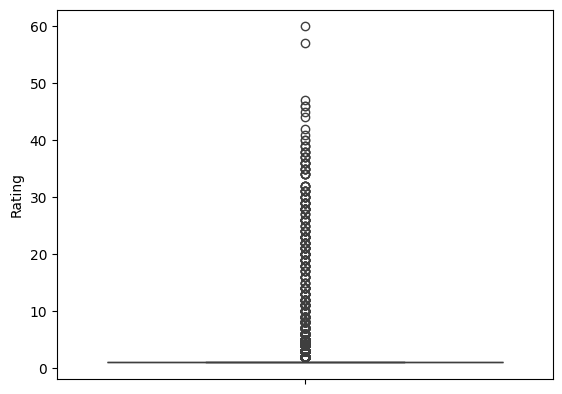

In [ ]:
sns.boxplot(data=no_of_ratings_per_product);

In [ ]:
quantiles = no_of_ratings_per_product.quantile(np.arange(0,1.01,0.01), interpolation='higher')


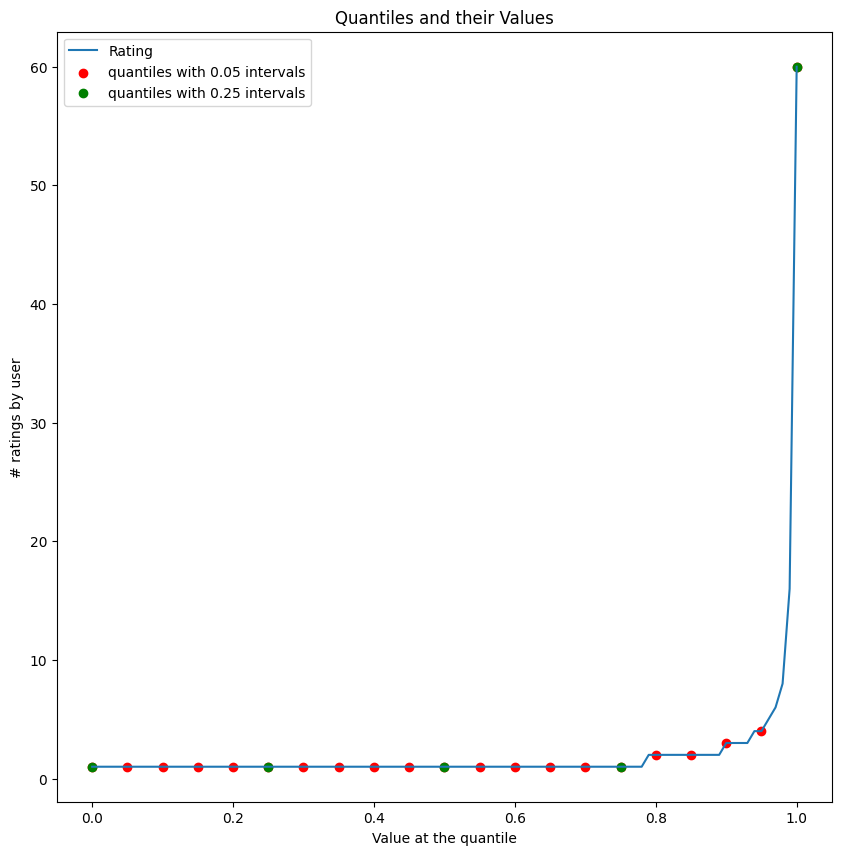

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='red', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='green', label = "quantiles with 0.25 intervals")
plt.ylabel('# ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [ ]:
new_df.groupby('ProductId')['Rating'].mean().head()


ProductId
0762451459    5.0
1304482596    1.0
1304482685    1.0
1304495396    1.0
1304511111    1.0
Name: Rating, dtype: float64

In [ ]:
new_df.groupby('ProductId')['Rating'].mean().sort_values(ascending=False).head()


ProductId
0762451459    5.0
B004JAZGOC    5.0
B004ITB3IW    5.0
B004ITYX52    5.0
B004IVM0EG    5.0
Name: Rating, dtype: float64

In [ ]:
new_df.groupby('ProductId')['Rating'].count().sort_values(ascending=False).head()


ProductId
B009FKNGGQ    60
B00AE0790U    57
B009FKNGRA    47
B00AO4EBOI    46
B008U2Y9BQ    46
Name: Rating, dtype: int64

In [ ]:
ratings_mean_count = pd.DataFrame(new_df.groupby('ProductId')['Rating'].mean())


In [ ]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('ProductId')['Rating'].count())


In [ ]:
ratings_mean_count.head()


,Rating,rating_counts
ProductId,,
0762451459,5.0,1
1304482596,1.0,1
1304482685,1.0,1
1304495396,1.0,1
1304511111,1.0,1


In [ ]:
ratings_mean_count['rating_counts'].max()


60

<Axes: >

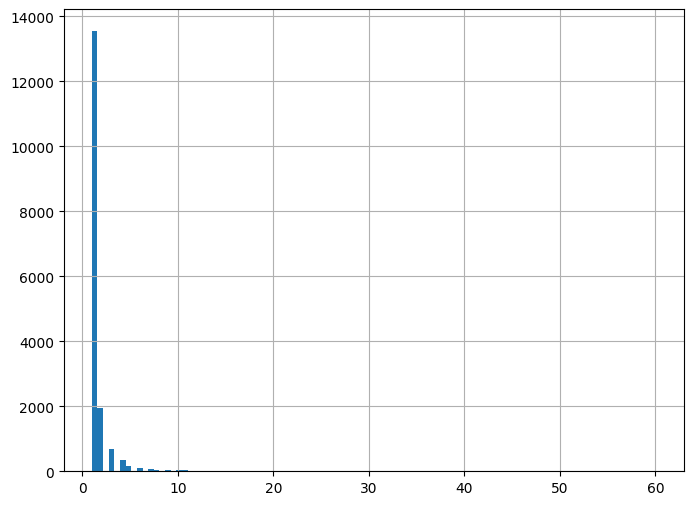

In [ ]:
plt.figure(figsize=(8,6))
ratings_mean_count['rating_counts'].hist(bins=100)

<Axes: >

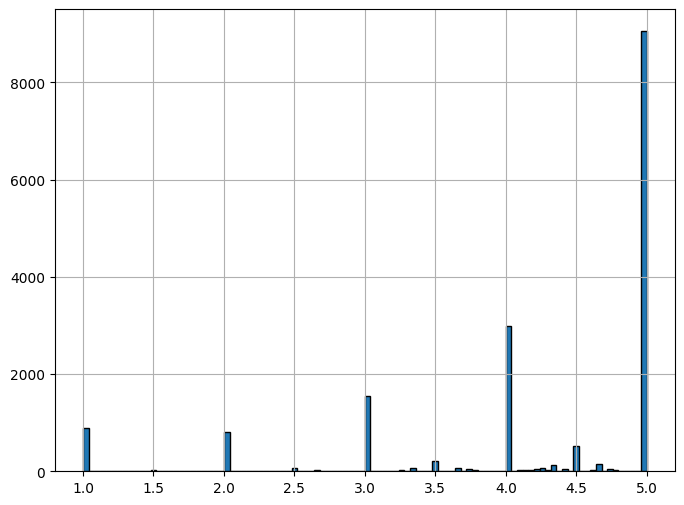

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=100)

<Figure size 800x600 with 0 Axes>

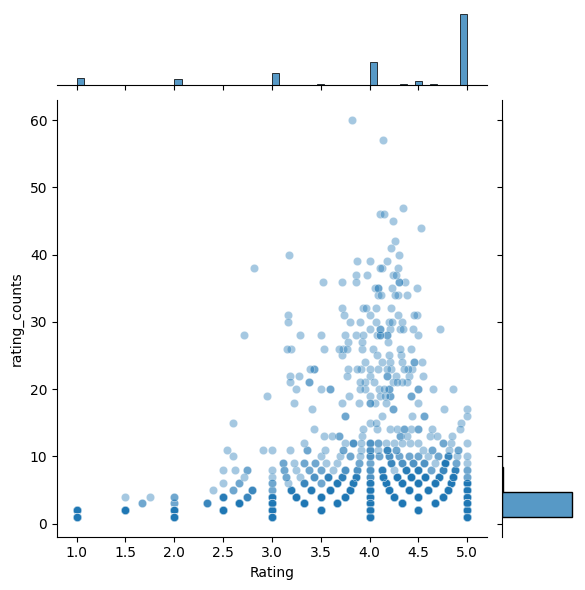

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<ipython-input-56-020166c0966d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_of_ratings_per_product, shade=True, ax=ax1)
<ipython-input-56-020166c0966d>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_of_ratings_per_product, shade=True, cumulative=True,ax=ax2)


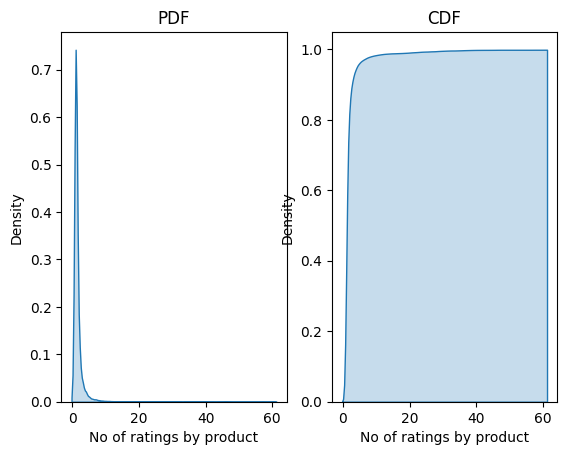

In [ ]:
ax1 = plt.subplot(121)
sns.kdeplot(no_of_ratings_per_product, shade=True, ax=ax1)
plt.xlabel('No of ratings by product')
plt.title("PDF")
ax2 = plt.subplot(122)
sns.kdeplot(no_of_ratings_per_product, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by product')
plt.title('CDF')
plt.show()

In [ ]:
no_of_ratings_per_user = new_df.groupby(by='UserId')['Rating'].count().sort_values(ascending=False)


<ipython-input-58-3f0c576d2856>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_of_ratings_per_user, shade=True, ax=ax1)
<ipython-input-58-3f0c576d2856>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_of_ratings_per_user, shade=True, cumulative=True,ax=ax2)


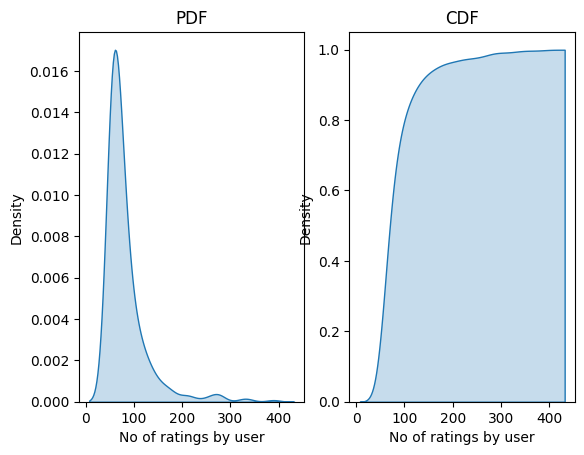

In [ ]:
ax1 = plt.subplot(121)
sns.kdeplot(no_of_ratings_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")
ax2 = plt.subplot(122)
sns.kdeplot(no_of_ratings_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')
plt.show()

<Axes: xlabel='ProductId'>

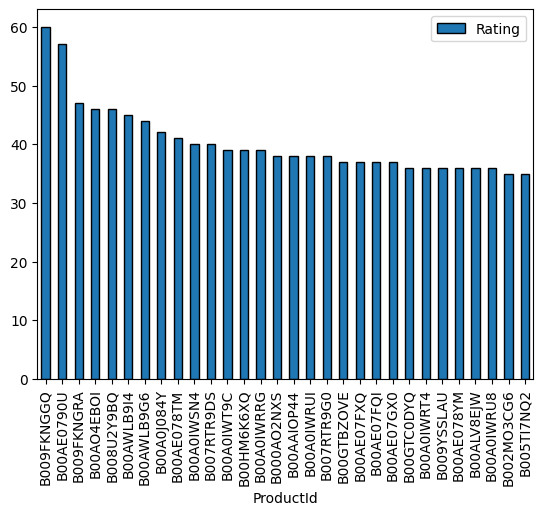

In [ ]:
popular_products = pd.DataFrame(new_df.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")


**POPULARITY BASED METHOD**

In [ ]:
#POPULARITY BASED METHOD

In [ ]:
train_data, test_data = train_test_split(new_df, test_size = 0.30, random_state=0)
print(train_data.head(5))

                 UserId   ProductId  Rating
1428367   AJ0LVMSVJ0CN1  B005MWYBL0     5.0
1985368  A3094EPI56GKZ6  B00H5V3T2I     4.0
1688114  A3GNEPABXLTKON  B008PJVPE8     5.0
1567537  A25C2M3QF9G7OQ  B007BF7D8Y     5.0
1550896  A31RULW0KNYJ5H  B0072XR560     4.0


In [ ]:
train_data_grouped = train_data.groupby('ProductId').agg({'UserId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'UserId': 'score'},inplace=True)
train_data_grouped.head()

,ProductId,score
0,0762451459,1
1,1304482596,1
2,1304482685,1
3,1304495396,1
4,1304511138,1


In [ ]:
train_data_sort = train_data_grouped.sort_values(['score', 'ProductId'], ascending = [0,1])
#Generate a recommendation rank based upon score
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
#Get the top 5 recommendations
popularity_recommendations = train_data_sort.head(5)
popularity_recommendations

,ProductId,score,Rank
10627,B009FKNGGQ,41,1.0
10972,B00AE0790U,40,2.0
10393,B008U2Y9BQ,35,3.0
11197,B00AWLB9I4,34,4.0
10854,B00A0J084Y,33,5.0


In [ ]:
def recommend(user_id):
 user_recommendations = popularity_recommendations

 #Add user_id column for which the recommendations are being generated
 user_recommendations['userId'] = user_id

 #Bring user_id column to the front
 cols = user_recommendations.columns.tolist()
 cols = cols[-1:] + cols[:-1]
 user_recommendations = user_recommendations[cols]

 return user_recommendations


In [ ]:
find_recom = ['A15BHBF0L0HV1F','A3VVJIZXLL1QFP','AFHY3XJJ6NCAI','A2WPY1SNQPCC00','AJMJREC90WJVP']
for i in find_recom:
 print("Here is the recommendation for the userId: %s\n" %(i))
 print(recommend(i))
 print("\n")


Here is the recommendation for the userId: A15BHBF0L0HV1F

               userId   ProductId  score  Rank
10627  A15BHBF0L0HV1F  B009FKNGGQ     41   1.0
10972  A15BHBF0L0HV1F  B00AE0790U     40   2.0
10393  A15BHBF0L0HV1F  B008U2Y9BQ     35   3.0
11197  A15BHBF0L0HV1F  B00AWLB9I4     34   4.0
10854  A15BHBF0L0HV1F  B00A0J084Y     33   5.0


Here is the recommendation for the userId: A3VVJIZXLL1QFP

               userId   ProductId  score  Rank
10627  A3VVJIZXLL1QFP  B009FKNGGQ     41   1.0
10972  A3VVJIZXLL1QFP  B00AE0790U     40   2.0
10393  A3VVJIZXLL1QFP  B008U2Y9BQ     35   3.0
11197  A3VVJIZXLL1QFP  B00AWLB9I4     34   4.0
10854  A3VVJIZXLL1QFP  B00A0J084Y     33   5.0


Here is the recommendation for the userId: AFHY3XJJ6NCAI

              userId   ProductId  score  Rank
10627  AFHY3XJJ6NCAI  B009FKNGGQ     41   1.0
10972  AFHY3XJJ6NCAI  B00AE0790U     40   2.0
10393  AFHY3XJJ6NCAI  B008U2Y9BQ     35   3.0
11197  AFHY3XJJ6NCAI  B00AWLB9I4     34   4.0
10854  AFHY3XJJ6NCAI  B00A

<ipython-input-64-2c9e21e7a9dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['userId'] = user_id
<ipython-input-64-2c9e21e7a9dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['userId'] = user_id
<ipython-input-64-2c9e21e7a9dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [ ]:
train_data_sort.head()

,ProductId,score,Rank
10627,B009FKNGGQ,41,1.0
10972,B00AE0790U,40,2.0
10393,B008U2Y9BQ,35,3.0
11197,B00AWLB9I4,34,4.0
10854,B00A0J084Y,33,5.0


In [ ]:
test_data.head()

,UserId,ProductId,Rating
1914137,A1VUGUKWX4B808,B00DPTW8JY,5.0
1765070,A1DH3QDZX8Z7GO,B00A0IWSN4,4.0
1819059,A21SKLDXVEJ89E,B00B108WMG,5.0
76822,A1YVJ2CLK0L2WR,B00021DJ32,4.0
1762303,A1R1BFJCMWX0Y3,B009YSSLAU,3.0


In [ ]:
test_data2 = test_data.copy()
#ratings.drop(['timestamp'], axis=1,inplace=True)
test_data2.drop(['UserId'],axis=1,inplace=True)
test_data2.rename(columns = {'Rating':'Act_rating'}, inplace = True)
test_data2.head()

,ProductId,Act_rating
1914137,B00DPTW8JY,5.0
1765070,B00A0IWSN4,4.0
1819059,B00B108WMG,5.0
76822,B00021DJ32,4.0
1762303,B009YSSLAU,3.0


In [ ]:
#Count of user_id for each unique product as recommendation score
train_data_grouped2 = train_data.groupby('ProductId').agg({'Rating': 'sum'}).reset_index()
train_data_grouped2.rename(columns = {'Rating': 'Sum_rating'},inplace=True)
train_data_grouped2.head()

,ProductId,Sum_rating
0,0762451459,5.0
1,1304482596,1.0
2,1304482685,1.0
3,1304495396,1.0
4,1304511138,1.0


In [ ]:
train_data_inner = pd.merge(train_data_grouped2, train_data_sort)
train_data_inner.head()

,ProductId,Sum_rating,score,Rank
0,0762451459,5.0,1,2502.0
1,1304482596,1.0,1,2503.0
2,1304482685,1.0,1,2504.0
3,1304495396,1.0,1,2505.0
4,1304511138,1.0,1,2506.0


In [ ]:
train_data_inner["Avg_Rating"] = train_data_inner["Sum_rating"]/train_data_inner["score"]
train_data_inner.head()

,ProductId,Sum_rating,score,Rank,Avg_Rating
0,0762451459,5.0,1,2502.0,5.0
1,1304482596,1.0,1,2503.0,1.0
2,1304482685,1.0,1,2504.0,1.0
3,1304495396,1.0,1,2505.0,1.0
4,1304511138,1.0,1,2506.0,1.0


In [ ]:
test_data_inner = pd.merge(train_data_inner, test_data2)
test_data_inner.head()

,ProductId,Sum_rating,score,Rank,Avg_Rating,Act_rating
0,B00004U9UY,8.0,2,1173.0,4.0,5.0
1,B000052WYD,4.0,2,1176.0,2.0,4.0
2,B000052WYD,4.0,2,1176.0,2.0,3.0
3,B000052WYL,5.0,1,2525.0,5.0,4.0
4,B000052YJM,21.0,5,365.0,4.2,4.0


In [ ]:
test_data_inner.head()

,ProductId,Sum_rating,score,Rank,Avg_Rating,Act_rating
0,B00004U9UY,8.0,2,1173.0,4.0,5.0
1,B000052WYD,4.0,2,1176.0,2.0,4.0
2,B000052WYD,4.0,2,1176.0,2.0,3.0
3,B000052WYL,5.0,1,2525.0,5.0,4.0
4,B000052YJM,21.0,5,365.0,4.2,4.0


In [ ]:
mse = mean_squared_error(test_data_inner["Act_rating"], test_data_inner["Avg_Rating"])
rmse = math.sqrt(mse)
print("RMSE for popularity based recommendation system:", rmse)

RMSE for popularity based recommendation system: 1.2364477476558067


In [ ]:
ratings.head()


,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0


In [ ]:
import pandas as pd
# Assuming train_data and test_data are lists of dictionaries or lists
# Convert train_data to pandas DataFrame
train_data_df = pd.DataFrame(train_data)
# Convert test_data to pandas DataFrame
test_data_df = pd.DataFrame(test_data)
import pandas as pd
# Assuming train_data2 is a pandas DataFrame with columns: userId, productId, Rating
# Step 1: Calculate item popularity
item_popularity = train_data.groupby('ProductId')['Rating'].count().reset_index()
item_popularity.rename(columns={'Rating': 'popularity'}, inplace=True)
# Step 2: Sort items by popularity
item_popularity_sorted = item_popularity.sort_values(by='popularity', ascending=False)
# Step 3: Define a function to recommend most popular items for a given user
def popularity_recommender(user_id, n_recommendations):
 # For a popularity-based recommender, recommendations are the most popular items
 recommendations = item_popularity_sorted.head(n_recommendations)
 return recommendations


In [ ]:
# Assuming train_data2 is a pandas DataFrame with columns: userId, productId, Rating
# Step 1: Calculate item popularity
item_popularity = train_data.groupby('ProductId')['Rating'].count().reset_index()
item_popularity.rename(columns={'Rating': 'popularity'}, inplace=True)
# Step 2: Sort items by popularity
item_popularity_sorted = item_popularity.sort_values(by='popularity', ascending=False)
# Step 3: Define a function to recommend most popular items for a given user
def popularity_recommender(user_id, n_recommendations):
 # For a popularity-based recommender, recommendations are the most popular items
 recommendations = item_popularity_sorted.head(n_recommendations)
 return recommendations
# Step 4: Specify users and generate recommendations
specified_users = ['AKM1MP6P0OYPR', 'A2CX7LUOHB2NDG', 'A2NWSAGRHCP8N5', 'A2WNBOD3WNDNKT', 'A1GI0U4ZRJA8WN']
recommendations = {}
for user_id in specified_users:
 recommendations[user_id] = popularity_recommender(user_id, n_recommendations=5)
# Step 5: Print the recommendations
for user_id, recs in recommendations.items():
 print(f"Recommendations for user {user_id}:")
 print(recs)


Recommendations for user AKM1MP6P0OYPR:
        ProductId  popularity
10627  B009FKNGGQ          41
10972  B00AE0790U          40
10393  B008U2Y9BQ          35
11197  B00AWLB9I4          34
11196  B00AWLB9G6          33
Recommendations for user A2CX7LUOHB2NDG:
        ProductId  popularity
10627  B009FKNGGQ          41
10972  B00AE0790U          40
10393  B008U2Y9BQ          35
11197  B00AWLB9I4          34
11196  B00AWLB9G6          33
Recommendations for user A2NWSAGRHCP8N5:
        ProductId  popularity
10627  B009FKNGGQ          41
10972  B00AE0790U          40
10393  B008U2Y9BQ          35
11197  B00AWLB9I4          34
11196  B00AWLB9G6          33
Recommendations for user A2WNBOD3WNDNKT:
        ProductId  popularity
10627  B009FKNGGQ          41
10972  B00AE0790U          40
10393  B008U2Y9BQ          35
11197  B00AWLB9I4          34
11196  B00AWLB9G6          33
Recommendations for user A1GI0U4ZRJA8WN:
        ProductId  popularity
10627  B009FKNGGQ          41
10972  B00AE0790

In [ ]:
import pandas as pd
import numpy as np

# Assuming test_data2 is a pandas DataFrame with columns: userId, productId, Rating
# Assuming popularity_model is already trained (although in this case it's a popularity-based model)

# Step 1: Calculate item popularity
item_popularity = train_data.groupby('ProductId')['Rating'].count().reset_index()
item_popularity.rename(columns={'Rating': 'popularity'}, inplace=True)

# Step 2: Sort items by popularity
item_popularity_sorted = item_popularity.sort_values(by='popularity', ascending=False)

# Step 3: Define a function to predict ratings using popularity-based model (for compatibility)
def predict_rating(user_id, item_id):
    # For a popularity-based model, return the average rating of the most popular items
    predicted_rating = item_popularity_sorted['popularity'].mean()
    return predicted_rating

# Step 4: Compute RMSE
def compute_rmse(predictions, actual):
    # Ensure predictions and actual have the same length
    if len(predictions) != len(actual):
        raise ValueError("Length of predictions and actual must be the same.")

    # Calculate RMSE
    rmse = np.sqrt(np.mean((predictions - actual) ** 2))
    return rmse

# Step 5: Generate predictions for test data
predicted_ratings = []
for _, row in test_data.iterrows():
    predicted_rating = predict_rating(row['UserId'], row['ProductId'])
    predicted_ratings.append(predicted_rating)

# Extract actual ratings from test_data2
actual_ratings = test_data['Rating']

# Step 6: Compute RMSE
pop_rmse = compute_rmse(np.array(predicted_ratings), np.array(actual_ratings))
print("RMSE for popularity-based model:", pop_rmse)


RMSE for popularity-based model: 2.833469087054382


**ITEM _ ITEM SIMILARITY RECOMMENDATION**




In [ ]:
#ITEM-ITEM SIMILARITY RECOMMENDATION

In [ ]:
import pandas as pd
import os
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

def item_similarity_recommender_and_print(dataset, n_recommendations):
    # Step 1: Create a user-item matrix
    user_item_matrix = dataset.pivot(index='UserId', columns='ProductId', values='Rating').fillna(0)

    # Step 2: Convert the user-item matrix to a sparse matrix
    sparse_user_item_matrix = sparse.csr_matrix(user_item_matrix.values)

    # Step 3: Compute item-item similarity matrix using cosine similarity
    item_item_similarity = cosine_similarity(sparse_user_item_matrix.T)

    # Iterate over the first 5 users
    unique_users = dataset['UserId'].unique()[:5]
    for user_id in unique_users:
        # Get the user's rated items
        user_rated_items = user_item_matrix.loc[user_id]

        # Compute the similarity between the user's rated items and all other items
        similarity_with_rated_items = item_item_similarity.dot(user_rated_items)

        # Sort items by similarity and select top n recommendations
        recommendations = pd.Series(similarity_with_rated_items, index=user_rated_items.index)
        recommendations = recommendations.sort_values(ascending=False).head(n_recommendations)

        # Print recommendations for each user
        print(f"Recommendations for user {user_id}:")
        print(recommendations)
        print("\n")

# Example: Recommend 5 items for the first 5 users in the dataset and print the recommendations
n_recommendations = 5
item_similarity_recommender_and_print(train_data, n_recommendations)


Recommendations for user AJ0LVMSVJ0CN1:
ProductId
B0013G49JS    239.941123
B005I8RH78    239.941123
B000QV2G14    239.941123
B003N41ZPY    239.941123
B002IDPHBE    239.941123
dtype: float64


Recommendations for user A3094EPI56GKZ6:
ProductId
B000MUTD5G    188.809895
B000C210DC    188.809895
B000X7EMM2    188.809895
B00161HFFU    188.809895
B000MUZA1W    188.809895
dtype: float64


Recommendations for user A3GNEPABXLTKON:
ProductId
B007NA4BHI    150.300518
B00H22R63I    150.300518
B00B213B9I    150.300518
B00CNXK6WO    150.300518
B00CNXJYUO    150.300518
dtype: float64


Recommendations for user A25C2M3QF9G7OQ:
ProductId
B001TSJU3A    121.957072
B0067YTMMA    121.957072
B000FKHI8M    121.957072
B004D282LU    121.957072
B0007TC9I0    121.957072
dtype: float64


Recommendations for user A31RULW0KNYJ5H:
ProductId
B001JQLNRI    94.650999
B0013L9ECA    94.650999
B009XUTCCA    94.650999
B006WVCF40    94.650999
B00BB9WBC4    76.551327
dtype: float64




In [ ]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load your dataset into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['UserId', 'ProductId', 'Rating']], reader)



# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the SVD model
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)


RMSE: 1.2476


1.2476144696337705

In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163001 sha256=112bbc4239100fdeeded7df10c06d7d7e50dc2f1495bf641a58b097a9b4eb9af
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


**MATRIX FACTORIZATION MODEL**

In [ ]:
#MATRIX FACTORIZATION MODEL

In [ ]:
# Define the list of users for whom you want to print recommendations and accuracy
users_to_recommend = ['AKM1MP6P0OYPR', 'A2CX7LUOHB2NDG', 'A2NWSAGRHCP8N5', 'A2WNBOD3WNDNKT', 'A1GI0U4ZRJA8WN']

# Initialize lists to store recommendations and actual ratings
recommended_items = []
actual_ratings = []

# Iterate over each user to make recommendations and calculate accuracy
for user_id in users_to_recommend:
    # Get the items the user hasn't rated
    user_items = set(ratings['ProductId']) - set(ratings[ratings['UserId'] == user_id]['ProductId'])

    # Predict ratings for the user
    user_predictions = [(iid, model.predict(user_id, iid).est) for iid in user_items]

    # Sort the predictions by estimated rating
    user_predictions.sort(key=lambda x: x[1], reverse=True)

    # Get the top N recommended items
    top_n_recommendations = user_predictions[:10]
    recommended_items.append(top_n_recommendations)

    # Get actual ratings for the user from the test set
    user_actual_ratings = [rating for (uid, iid, rating) in testset if uid == user_id]
    actual_ratings.append(user_actual_ratings)

# Print recommendations and actual ratings for each user
for i, user_id in enumerate(users_to_recommend):
    print(f"User: {user_id}")
    print("Recommended Items: ", recommended_items[i])
    print("\n")

# Calculate accuracy
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print("RMSE:", rmse)


User: AKM1MP6P0OYPR
Recommended Items:  [('B001D0NARQ', 4.894007993386345), ('B00GJX58PE', 4.890645263389905), ('B004AI5756', 4.88684807083335), ('B00466VJ04', 4.884237670081702), ('B001F0RBRE', 4.880840891165776), ('B004CNRDBU', 4.879655612130664), ('B0009KN6BQ', 4.8790620465890395), ('B002YFN49I', 4.877501992995113), ('B00J44VWDC', 4.876375620965691), ('B009OWSHQE', 4.873445922649056)]


User: A2CX7LUOHB2NDG
Recommended Items:  [('B001D0NARQ', 4.894007993386345), ('B00GJX58PE', 4.890645263389905), ('B004AI5756', 4.88684807083335), ('B00466VJ04', 4.884237670081702), ('B001F0RBRE', 4.880840891165776), ('B004CNRDBU', 4.879655612130664), ('B0009KN6BQ', 4.8790620465890395), ('B002YFN49I', 4.877501992995113), ('B00J44VWDC', 4.876375620965691), ('B009OWSHQE', 4.873445922649056)]


User: A2NWSAGRHCP8N5
Recommended Items:  [('B001D0NARQ', 4.894007993386345), ('B00GJX58PE', 4.890645263389905), ('B004AI5756', 4.88684807083335), ('B00466VJ04', 4.884237670081702), ('B001F0RBRE', 4.880840891165776